# Embeddings

## Word Embeddings 

-------
<img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/embeddings.png" alt="embeddings" width="1000"/>

Pop Quiz
---

Do computers prefer numbers or words?



__Numbers__

## Self Study: What are Word Embeddings?
-----

<br>
<br>
Word Embedding are a collection of algorithms that map words (strings) to numbers (vectors - arrays of floats).
</details>

###  Why are Word Embeddings important?

Turns text into a numerical form (meaningful word vectors) allows computers to better process the information.

Including creating a representation that other Deep Learning and Machine Learning algorithms can use in-turn.

### How does word2vec work?

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/firth.png" width="400"/></center>

>“You shall know a word
>by the company it keeps”

> \- J. R. Firth 1957

### Distributional Hypothesis

Words that are used and occur in the same contexts tend to have similar meanings

__Example:__  
> ... government debt problems are turning into __banking__ crises...  

> ... Europe governments needs unified __banking__ regulation to replace the hodgepodge of debt regulations...

The words: _government_, _regulation_ and _debt_ probably represent some aspect of __banking__ since they frequently appear near by.

The words: _Pokeman_ and _tubular_ probably do __not__ represent some aspect of __banking__ since they do not frequently appear near by.

### How does word2vec model the Distributional Hypothesis?


<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/w2v_neural_net.png" width="1000"/></center>

word2Vec is a __very__ simple neural network

Once the training is complete, the output softmax layer is discarded and the remaining weights become the embedding layer

<center><img src="attachment:b97b7a58-3a8d-406c-a29a-2afba143df5c.png" width="1000"/></center>

Note the bow-tie shape - that is is an __autoencoder__. 

### Autoencoders

<center><img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png" width="1000"/></center>

Compress a sparse representation into a dense representation. 

Learns the mapping that best preserves the structure of the original space.

## Story time...

A man and woman meet each other ...
The man and woman become king and queen ...
The king and queen get old and stop talking to each other. Instead, they read books and magazines ...

In [1]:
# Represent data
corpus = """The man and woman meet each other ...
         The man and woman become king and queen ...
         The king and queen get old and stop talking to each other. Instead, they read books and magazines ...
         """

In [2]:
import numpy as np

# Assign important words to vectors by hand
important_words = ['queen', 'book', 'king', 'magazine', 'woman', 'man']

vectors = np.array([[0.1,   0.3],  # queen
                    [-0.5, -0.1],  # book
                    [0.2,   0.2],  # king
                    [-0.3, -0.2],  # magazine
                    [-0.5,  0.4],  # car
                    [-0.45, 0.3]]) # bike

vectors

array([[ 0.1 ,  0.3 ],
       [-0.5 , -0.1 ],
       [ 0.2 ,  0.2 ],
       [-0.3 , -0.2 ],
       [-0.5 ,  0.4 ],
       [-0.45,  0.3 ]])

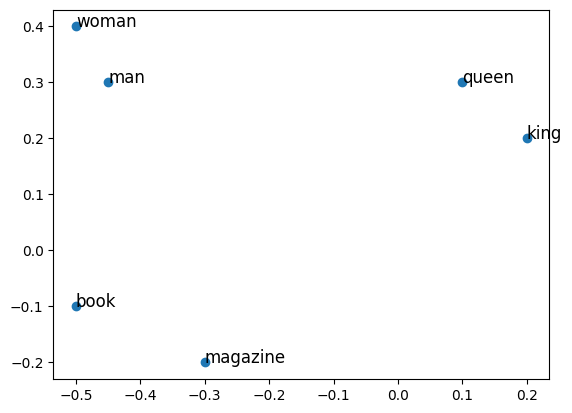

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the most important words
plt.plot(vectors[:,0], vectors[:,1], 'o')
for word, x, y in zip(important_words, vectors[:,0], vectors[:,1]):
    plt.annotate(word, (x, y), size=12)

## Understand how we get there...

### How many dimensions are data represented in? 

**There are 2 dimensions** 

How many dimensions would we need to represent 1-hot encoded word vectors? 

__5 dimensions__

Typically you would use n-1 word vectors (a baseline word would be coded as all zeros). 

```python
# Encode each word using 1-hot encoding
{'queen':    [0, 0, 0, 0, 0],
 'book':     [0, 0, 0, 0, 1],
 'king':     [0, 0, 0, 1, 0],
 'magazine': [0, 0, 1, 0, 0],
 'woman':    [0, 1, 0, 0, 0],
 'man':      [1, 0, 0, 0, 0],
}
```

### Deep Learning: 

word2vec creates low-dimensional, dense vectors
In contrast to other NLP encodings which are larger and sparser.

In terms of Big O space complexity, how does the dimensionality of the representation increase in word2vec vs 1-hot encoding?

 For example - if double the number of unique words in our dataset how many more dimensions would we need to represent the data? 

Word2vec is __constant O(1)__. Word2vec always represents the data in a fixed number of dimensions.

1-hot encoding is __linear O(n)__. We have to add 1 dimension for every unique word.

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/w2v_neural_net.png" width="1000"/></center>

The vectors are the weights in the neural network. Each hidden node is a dimension.

The dimensions are not directly interpretable.

In [4]:
# Training: From random to clustering
from IPython.display import VimeoVideo

VimeoVideo("112168934")

### Skip-gram vs. CBOW


<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/cbo_vs_skipgram.png" width="1000"/></center>

The weights start random. Then group and separate during each training pass.

The 2 training methods for word2vec training

1) “Skip-gram”: Predict target word, given a nearby word
2) “Continuous bag of words”: Predict target word, given a context


CBOW is several times faster to train than the skip-gram and has slightly better accuracy for  frequent words.  

Skip-gram works well with a small amount of the training data and well represents rare words.

__Skip-gram is the most common training methodology.__


## More on SkipGram and CBOW

Sentence:  
"Selling these fine leather jackets"

### Skip-gram training methodology:
Predict target word, given a nearby word

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/skip_gram2.png" width="900"/></center>


### Skip-gram example

>“… selling these fine leather jackets”

```
bi-grams = {selling these, these fine, 
            fine leather, leather jackets}

skip-two-bi-grams = {selling these, selling fine, selling leather, 
                    these fine, these leather, these jackets, 
                    fine leather, fine jackets, 
                    leather jackets}
```

### Defining skip-grams

<img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/skip-gram-equation.png" style="width: 400px;"/>


### Skip-Gram training methodology, deep dive

<img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/skip_gram_detailed.png" style="width: 400px;"/>

The target word is now at the input layer, and the context words are on the output layer.

On the output layer, instead of outputing one multinomial distribution, we are outputing C multinomial distributions. Each output is computed using the same hidden to output matrix


### Continuous bag of words (CBOW) training methodology: <br>Predict target word, given a context
-----

<center><img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/w4-s3/cbow2.png" width="900"/></center>

The context is represented as a bag of the words contained in a fixed size window around the target word.

[Reference](https://fasttext.cc/docs/en/unsupervised-tutorial.html)

[Detailed explanation](http://alexminnaar.com/word2vec-tutorial-part-ii-the-continuous-bag-of-words-model.html)

## Summary

- Word2vec: Create a dense vector representation of words that models semantic meaning based on context
- Word2Vec is popular because it is straight forward to implement and creates dense embedding vectors.
- Word2Vec is a _relatively_ simple neural net with 1 input layer, 1 hidden layer, and 1 output layer.
- There are 2 common training methodology: 
    1. CBOW: given context, predict word
    2. skip-gram: given word, predict context
- Sets you up for machine learning and Deep Learning

# NLP Embeddings II

# PreComputed Embeddings: 

Waht if we didnt have to comput the emebddings ourselves?

We are going to use a pre-trained word embedding for finding word analogies and equivalence. This exercise can be used as an Intrinsic Evaluation for the word embedding performance. In this notebook, you will apply linear algebra operations using NumPy to find analogies between words manually. This will help you to prepare for this week's assignment.

In [5]:
import pandas as pd # Library for Dataframes 
import numpy as np # Library for math functions
import pickle # Python object serialization library. Not secure

word_embeddings = pickle.load( open( "word_embeddings_subset.p", "rb" ) )
len(word_embeddings) # there should be 243 words that will be used in this assignment

word_embeddings

{'country': array([-0.08007812,  0.13378906,  0.14355469,  0.09472656, -0.04736328,
        -0.02355957, -0.00854492, -0.18652344,  0.04589844, -0.08154297,
        -0.03442383, -0.11621094,  0.21777344, -0.10351562, -0.06689453,
         0.15332031, -0.19335938,  0.26367188, -0.13671875, -0.05566406,
         0.07470703, -0.00070953,  0.09375   , -0.14453125,  0.04296875,
        -0.01916504, -0.22558594, -0.12695312, -0.0168457 ,  0.05224609,
         0.0625    , -0.1484375 , -0.01965332,  0.17578125,  0.10644531,
        -0.04760742, -0.10253906, -0.28515625,  0.10351562,  0.20800781,
        -0.07617188, -0.04345703,  0.08642578,  0.08740234,  0.11767578,
         0.20996094, -0.07275391,  0.1640625 , -0.01135254,  0.0025177 ,
         0.05810547, -0.03222656,  0.06884766,  0.046875  ,  0.10107422,
         0.02148438, -0.16210938,  0.07128906, -0.16210938,  0.05981445,
         0.05102539, -0.05566406,  0.06787109, -0.03759766,  0.04345703,
        -0.03173828, -0.03417969, -0.011

Now that the model is loaded, we can take a look at the word representations. First, note that the _word_embeddings_ is a dictionary. Each word is the key to the entry, and the value is its corresponding vector presentation. Remember that square brackets allow access to any entry if the key exists. 

In [6]:
countryVector = word_embeddings['country'] # Get the vector representation for the word 'country'
print(type(countryVector)) # Print the type of the vector. Note it is a numpy array
print(countryVector) # Print the values of the vector.  

<class 'numpy.ndarray'>
[-0.08007812  0.13378906  0.14355469  0.09472656 -0.04736328 -0.02355957
 -0.00854492 -0.18652344  0.04589844 -0.08154297 -0.03442383 -0.11621094
  0.21777344 -0.10351562 -0.06689453  0.15332031 -0.19335938  0.26367188
 -0.13671875 -0.05566406  0.07470703 -0.00070953  0.09375    -0.14453125
  0.04296875 -0.01916504 -0.22558594 -0.12695312 -0.0168457   0.05224609
  0.0625     -0.1484375  -0.01965332  0.17578125  0.10644531 -0.04760742
 -0.10253906 -0.28515625  0.10351562  0.20800781 -0.07617188 -0.04345703
  0.08642578  0.08740234  0.11767578  0.20996094 -0.07275391  0.1640625
 -0.01135254  0.0025177   0.05810547 -0.03222656  0.06884766  0.046875
  0.10107422  0.02148438 -0.16210938  0.07128906 -0.16210938  0.05981445
  0.05102539 -0.05566406  0.06787109 -0.03759766  0.04345703 -0.03173828
 -0.03417969 -0.01116943  0.06201172 -0.08007812 -0.14941406  0.11914062
  0.02575684  0.00302124  0.04711914 -0.17773438  0.04101562  0.05541992
  0.00598145  0.03027344 -0.07

It is important to note that we store each vector as a NumPy array. It allows us to use the linear algebra operations on it. 

The vectors have a size of 300, while the vocabulary size of Google News is around 3 million words! 

In [36]:
#Get the vector for a given word:
def vec(w):
    return word_embeddings[w]

## Operating on word embeddings

Remember that understanding the data is one of the most critical steps in Data Science. Word embeddings are the result of machine learning processes and will be part of the input for further processes. These word embedding needs to be validated or at least understood because the performance of the derived model will strongly depend on its quality.

Word embeddings are multidimensional arrays, usually with hundreds of attributes that pose a challenge for its interpretation. 

In this notebook, we will visually inspect the word embedding of some words using a pair of attributes. Raw attributes are not the best option for the creation of such charts but will allow us to illustrate the mechanical part in Python. 

In the next cell, we make a beautiful plot for the word embeddings of some words. Even if plotting the dots gives an idea of the words, the arrow representations help to visualize the vector's alignment as well.

In [37]:
import matplotlib.pyplot as plt # Import matplotlib

words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

bag2d

array([[-0.13964844,  0.06225586, -0.27929688, ...,  0.20410156,
         0.23535156, -0.05102539],
       [-0.16113281,  0.10546875, -0.13867188, ...,  0.25585938,
         0.20214844, -0.01928711],
       [-0.0005188 ,  0.16015625,  0.0016098 , ..., -0.03540039,
         0.08886719, -0.30273438],
       ...,
       [ 0.02978516,  0.25585938,  0.23925781, ..., -0.06030273,
         0.19726562, -0.2734375 ],
       [-0.11865234,  0.19921875, -0.22265625, ...,  0.09960938,
         0.20605469, -0.09912109],
       [ 0.18066406, -0.0090332 ,  0.12988281, ..., -0.33984375,
         0.2734375 ,  0.04492188]], dtype=float32)

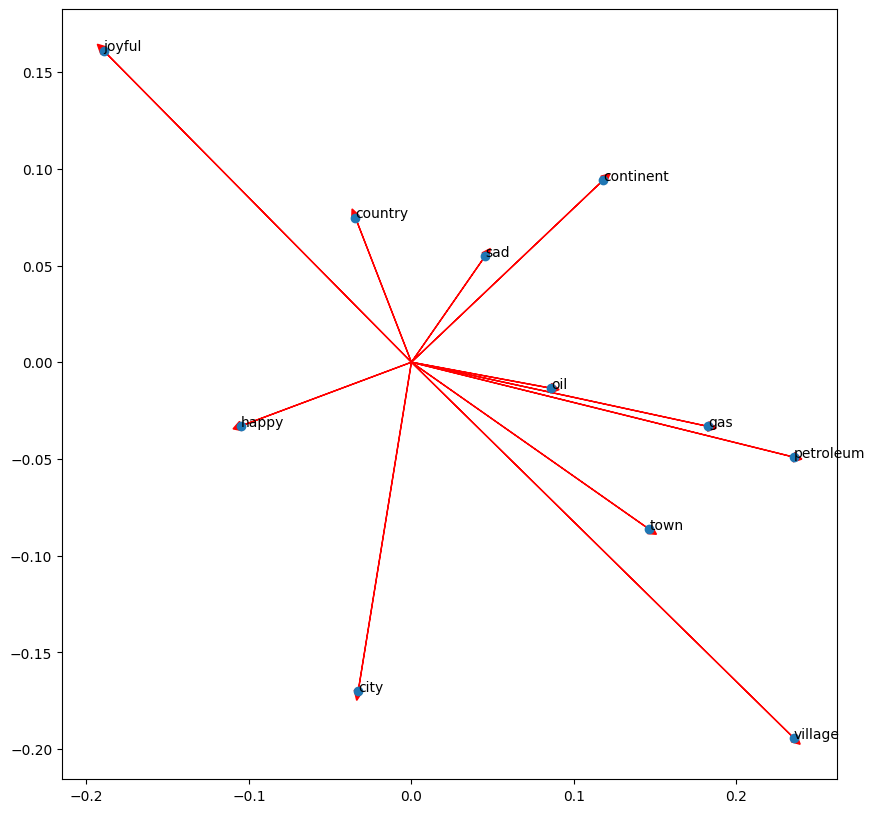

In [39]:
fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 10 # Select the column for the x axis
col2 = 20 # Select the column for the y axis

# Print an arrow for each word
for word in bag2d:
    ax.arrow(0, 0, word[col1], word[col2], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)

    
ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()

Note that similar words like 'village' and 'town' or 'petroleum', 'oil', and 'gas' tend to point in the same direction. Also, note that 'sad' and 'happy' looks close to each other; however, the vectors point in opposite directions.

In this chart, one can figure out the angles and distances between the words. Some words are close in both kinds of distance metrics.

## Word distance

Now plot the words 'sad', 'happy', 'town', and 'village'. In this same chart, display the vector from 'village' to 'town' and the vector from 'sad' to 'happy'. Let us use NumPy for these linear algebra operations.

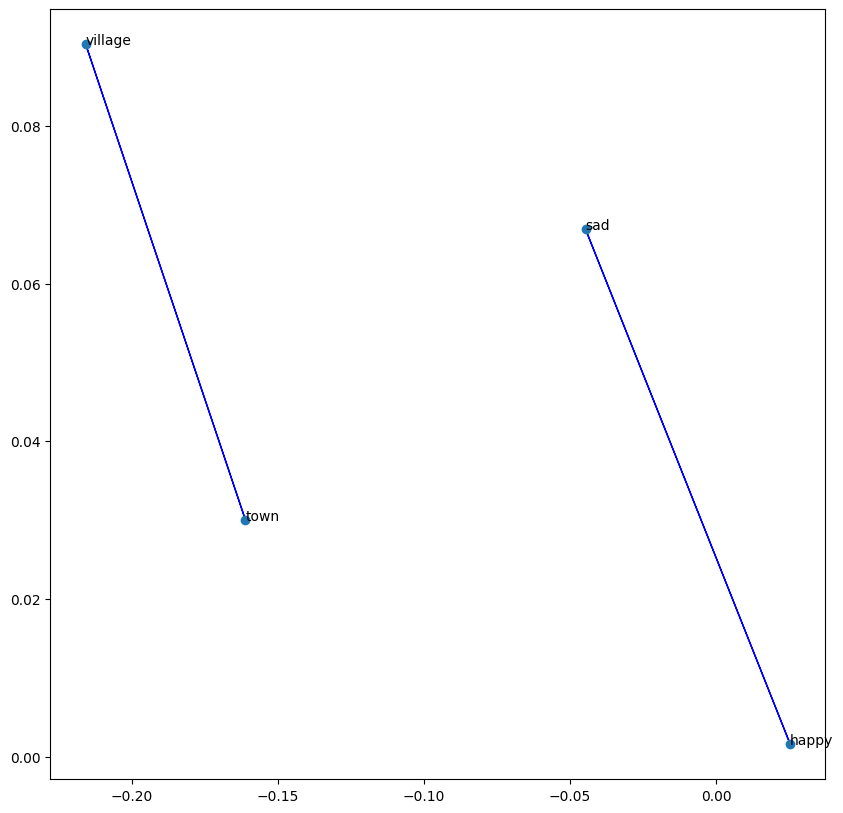

In [40]:
words = ['sad', 'happy', 'town', 'village']

bag2d = np.array([vec(word) for word in words]) # Convert each word to its vector representation

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image

col1 = 3 # Select the column for the x axe
col2 = 2 # Select the column for the y axe

# Print an arrow for each word
for word in bag2d:
    pass
    #ax.arrow(0, 0, word[col1], word[col2], head_width=0.0005, head_length=0.0005, fc='r', ec='r', width = 1e-5)
    
# print the vector difference between village and town
village = vec('village')
town = vec('town')
diff = town - village
ax.arrow(village[col1], village[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)

# print the vector difference between village and town
sad = vec('sad')
happy = vec('happy')
diff = happy - sad
ax.arrow(sad[col1], sad[col2], diff[col1], diff[col2], fc='b', ec='b', width = 1e-5)


ax.scatter(bag2d[:, col1], bag2d[:, col2]); # Plot a dot for each word

# Add the word label over each dot in the scatter plot
for i in range(0, len(words)):
    ax.annotate(words[i], (bag2d[i, col1], bag2d[i, col2]))


plt.show()


## Linear algebra on word embeddings

In the lectures, we saw the analogies between words using algebra on word embeddings. Let us see how to do it in Python with Numpy.

To start, get the **norm** of a word in the word embedding.

In [10]:
print(np.linalg.norm(vec('town'))) # Print the norm of the word town
print(np.linalg.norm(vec('sad'))) # Print the norm of the word sad

2.3858097
2.9004838


## Predicting capitals

Now, applying vector difference and addition, one can create a vector representation for a new word. For example, we can say that the vector difference between 'France' and 'Paris' represents the concept of Capital.

One can move from the city of Madrid in the direction of the concept of Capital, and obtain something close to the corresponding country to which Madrid is the Capital.

In [42]:
capital = vec('France') - vec('Paris')
country = vec('Madrid') + capital

print(country[0:5]) # Print the first 5 values of the vector

[-0.02905273 -0.2475586   0.53952026  0.20581055 -0.14862823]


We can observe that the vector 'country' that we expected to be the same as the vector for Spain is not exactly it.

In [12]:
diff = country - vec('Spain')
print(diff[0:10])

[-0.06054688 -0.06494141  0.37643433  0.08129883 -0.13007355 -0.00952148
 -0.03417969 -0.00708008  0.09790039 -0.01867676]


So, we have to look for the closest words in the embedding that matches the candidate country. If the word embedding works as expected, the most similar word must be 'Spain'. Let us define a function that helps us to do it. We will store our word embedding as a DataFrame, which facilitate the lookup operations based on the numerical vectors.

In [13]:
# Create a dataframe out of the dictionary embedding. This facilitate the algebraic operations
keys = word_embeddings.keys()
data = []
for key in keys:
    data.append(word_embeddings[key])

embedding = pd.DataFrame(data=data, index=keys)
# Define a function to find the closest word to a vector:
def find_closest_word(v, k = 1):
    
    # Calculate the vector difference from each word to the input vector
    diff = embedding.values - v 
    # Get the norm of each difference vector. 
    # It means the squared euclidean distance from each word to the input vector
    delta = np.sum(diff * diff, axis=1)
    # Find the index of the minimun distance in the array
    i = np.argmin(delta)
    # Return the row name for this item
    return embedding.iloc[i].name


In [14]:
# Print some rows of the embedding as a Dataframe
embedding.head(10)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
country,-0.080078,0.133789,0.143555,0.094727,-0.047363,-0.023560,-0.008545,-0.186523,0.045898,-0.081543,...,-0.145508,0.067383,-0.244141,-0.077148,0.047607,-0.075195,-0.149414,-0.044189,0.097168,0.067383
city,-0.010071,0.057373,0.183594,-0.040039,-0.029785,-0.079102,0.071777,0.013306,-0.143555,0.011292,...,0.024292,-0.168945,-0.062988,0.117188,-0.020508,0.030273,-0.247070,-0.122559,0.076172,-0.234375
China,-0.073242,0.135742,0.108887,0.083008,-0.127930,-0.227539,0.151367,-0.045654,-0.065430,0.034424,...,0.140625,0.087402,0.152344,0.079590,0.006348,-0.037842,-0.183594,0.137695,0.093750,-0.079590
Iraq,0.191406,0.125000,-0.065430,0.060059,-0.285156,-0.102539,0.117188,-0.351562,-0.095215,0.200195,...,-0.100586,-0.077148,-0.123047,0.193359,-0.153320,0.089355,-0.173828,-0.054688,0.302734,0.105957
oil,-0.139648,0.062256,-0.279297,0.063965,0.044434,-0.154297,-0.184570,-0.498047,0.047363,0.110840,...,-0.195312,-0.345703,0.217773,-0.091797,0.051025,0.061279,0.194336,0.204102,0.235352,-0.051025
town,0.123535,0.159180,0.030029,-0.161133,0.015625,0.111816,0.039795,-0.196289,-0.039307,0.067871,...,-0.007935,-0.091797,-0.265625,0.029297,0.089844,-0.049805,-0.202148,-0.079590,0.068848,-0.164062
Canada,-0.136719,-0.154297,0.269531,0.273438,0.086914,-0.076172,-0.018677,0.006256,0.077637,-0.211914,...,0.105469,0.030762,-0.039307,0.183594,-0.117676,0.191406,0.074219,0.020996,0.285156,-0.257812
London,-0.267578,0.092773,-0.238281,0.115234,-0.006836,0.221680,-0.251953,-0.055420,0.020020,0.149414,...,-0.008667,-0.008484,-0.053223,0.197266,-0.296875,0.064453,0.091797,0.058350,0.022583,-0.101074
England,-0.198242,0.115234,0.062500,-0.058350,0.226562,0.045898,-0.062256,-0.202148,0.080566,0.021606,...,0.135742,0.109375,-0.121582,0.008545,-0.171875,0.086914,0.070312,0.003281,0.069336,0.056152
Australia,0.048828,-0.194336,-0.041504,0.084473,-0.114258,-0.208008,-0.164062,-0.269531,0.079102,0.275391,...,0.021118,0.171875,0.042236,0.221680,-0.239258,-0.106934,0.030884,0.006622,0.051270,-0.135742


Now let us find the name that corresponds to our numerical country:

In [15]:
find_closest_word(country)

'Spain'

## Predicting other Countries

In [16]:
find_closest_word(vec('Italy') - vec('Rome') + vec('Madrid'))

'Spain'

In [17]:
print(find_closest_word(vec('Berlin') + capital))
print(find_closest_word(vec('Beijing') + capital))

Germany
China


However, it does not always work.

In [18]:
print(find_closest_word(vec('Lisbon') + capital))

Lisbon


## Represent a sentence as a vector

A whole sentence can be represented as a vector by summing all the word vectors that conform to the sentence. Let us see. 

In [19]:
doc = "Spain petroleum city king"
vdoc = [vec(x) for x in doc.split(" ")]
doc2vec = np.sum(vdoc, axis = 0)
doc2vec

array([ 2.87475586e-02,  1.03759766e-01,  1.32629395e-01,  3.33007812e-01,
       -2.61230469e-02, -5.95703125e-01, -1.25976562e-01, -1.01306152e+00,
       -2.18544006e-01,  6.60705566e-01, -2.58300781e-01, -2.09960938e-02,
       -7.71484375e-02, -3.07128906e-01, -5.94726562e-01,  2.00561523e-01,
       -1.04980469e-02, -1.10748291e-01,  4.82177734e-02,  6.38977051e-01,
        2.36083984e-01, -2.69775391e-01,  3.90625000e-02,  4.16503906e-01,
        2.83416748e-01, -7.25097656e-02, -3.12988281e-01,  1.05712891e-01,
        3.22265625e-02,  2.38403320e-01,  3.88183594e-01, -7.51953125e-02,
       -1.26281738e-01,  6.60644531e-01, -7.89794922e-01, -7.04345703e-02,
       -1.14379883e-01, -4.78515625e-02,  4.76318359e-01,  5.31127930e-01,
        8.10546875e-02, -1.17553711e-01,  1.02050781e+00,  5.59814453e-01,
       -1.17187500e-01,  1.21826172e-01, -5.51574707e-01,  1.44531250e-01,
       -7.66113281e-01,  5.36102295e-01, -2.80029297e-01,  3.85986328e-01,
       -2.39135742e-01, -

In [20]:
find_closest_word(doc2vec)

'petroleum'

## Embedding Models

What if we could donwload a model with already all the English dictionary in it?

In [21]:
#$%pip install gensim
%pip install scipy==1.12

from scipy.linalg import triu

import gensim
import gensim.downloader as api

Note: you may need to restart the kernel to use updated packages.


In [43]:
# the model I'd like to use
#model_nope = api.load("word2vec-google-news-300")

# too large, let's try something more modest
model = api.load("glove-wiki-gigaword-100")

# each word has an encoding
print(model['boat'])

print(model['boat'].size)

[-0.0083229  0.3696    -0.24436   -0.89288   -0.23607   -0.41659
  0.48309    0.91159    0.14498   -0.096963   0.55061    1.0376
  0.32243   -0.01381    0.0098052 -0.66346    0.27949   -0.74099
 -0.29602    0.64596    1.1305     0.54629    0.49664   -0.87378
  0.42399    0.35015   -1.9151     0.010363   0.35684   -0.32398
 -0.66927    0.43628   -0.20924    0.28862    0.63752   -0.18789
 -0.079442   0.30494    0.8829    -0.3143    -1.2595    -0.72301
  0.077278  -0.045894   1.0251     0.25472   -0.2566     0.18428
  0.34037    0.53185   -0.070906   0.57464    0.5131     1.1666
  0.1848    -1.4466    -0.41846    0.011812   2.1553     0.52012
 -0.9029     0.43183    0.60584    0.72845   -0.32243    0.73929
 -0.68845    0.25407   -0.20834   -0.059242  -0.45655   -0.27773
  0.7168     0.075051   0.41672    0.77879    0.38134    0.19478
 -0.41434    0.073975  -0.043165  -0.08107    0.15718    0.40069
 -0.23959   -0.81604   -0.027071  -0.82597   -0.49703   -0.38626
 -0.20425    0.23017    0.6

In [23]:
#and you can search for "similar" words (words that could occupy the same space)
model.most_similar('boat')

[('boats', 0.8819122910499573),
 ('ship', 0.8258436322212219),
 ('vessel', 0.8200733661651611),
 ('ferry', 0.77042156457901),
 ('sailing', 0.7610524296760559),
 ('ships', 0.7407433986663818),
 ('capsized', 0.7383140921592712),
 ('barge', 0.7286108136177063),
 ('fishing', 0.7228102087974548),
 ('yacht', 0.7208371758460999)]

In [24]:
model.most_similar('book')

[('books', 0.8476485013961792),
 ('novel', 0.8181166648864746),
 ('published', 0.8023923635482788),
 ('story', 0.7941390872001648),
 ('author', 0.7937875390052795),
 ('wrote', 0.7930577397346497),
 ('essay', 0.7821518182754517),
 ('biography', 0.7754694819450378),
 ('written', 0.760090172290802),
 ('fiction', 0.7549653053283691)]

# Now for the jaw dropping part

In [46]:
# you can "add" or subtract tendencies
model.most_similar(positive=['woman','king']
                    ,negative=['man']
                    ,topn=1)

#model.most_similar(positive=['woman','king'],negative=['man'],topn=1)

[('queen', 0.7698541283607483)]

In [26]:
model.most_similar(positive=['woman','boy'],negative=['man'],topn=1)

[('girl', 0.9095937609672546)]

In [27]:
#if at first you don't succeed
model.most_similar(positive=['grape','beer'],negative=['barley'],topn=1)

[('wine', 0.7183154225349426)]

In [28]:
model.most_similar(positive=['lisbon','spain'],negative=['madrid'],topn=1)

[('portugal', 0.8062521815299988)]

## Cosine similarity

![cosine](https://www.oreilly.com/api/v2/epubs/9781788295758/files/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png)

In [29]:
#why does this work?
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([model['king']],[model['duck']])

array([[0.25083008]], dtype=float32)

In [30]:
cosine_similarity([model['king']],[model['man']])

array([[0.5118681]], dtype=float32)

In [31]:
cosine_similarity([model['king']],[model['crown']])

array([[0.66475254]], dtype=float32)

In [32]:
cosine_similarity([model['king']],[model['monarch']])

array([[0.6977891]], dtype=float32)

In [33]:
#now that we established a baseline for similarity...

In [34]:
cosine_similarity([model['king']-model['queen']],[model['son']-model['daughter']])

array([[0.70172185]], dtype=float32)

In [35]:
cosine_similarity([model['russia']-model['moscow']],[model['poland']-model['warsaw']])

array([[0.7183124]], dtype=float32)